# Seaborn

1. Numerical (숫자 vs 숫자)
    * scatterplot: 산점도
    * lmplot: 선형회귀모형
    * jointplot: 데이터 밀도


2. Categorical (숫자 vs 범주)
    * boxplot & violinplot: 카테고리별 데이터분포
    * barplot: 크기비교
    * heatmap: 카테고리별 수치 비교


3. Map (lat & long) - folium 사용

## Numerical

In [1]:
import seaborn as sns

In [2]:
raw = sns.load_dataset('tips')

In [3]:
raw.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


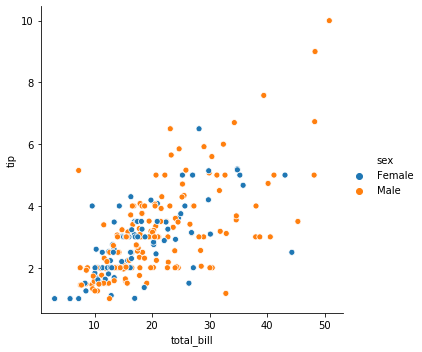

In [6]:
sns.relplot(data = raw, x = 'total_bill', y = 'tip', hue = 'sex', kind = 'scatter')

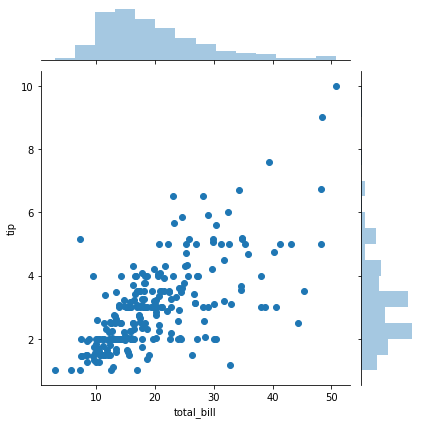

In [7]:
sns.jointplot(data = raw, x = 'total_bill', y = 'tip', kind = 'scatter')
# jointplot shows both plot and distribution of each column in a form of a histogram

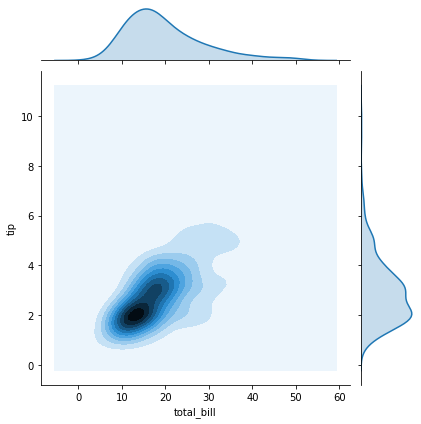

In [9]:
sns.jointplot(data = raw, x = 'total_bill', y = 'tip', kind = 'kde')


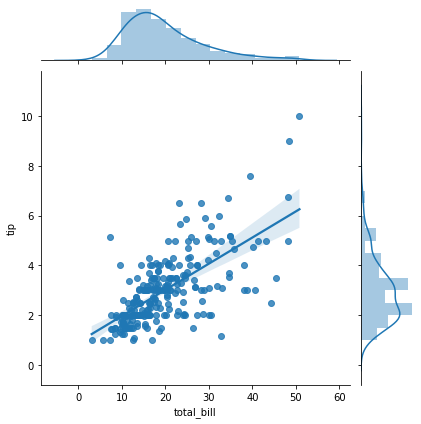

In [10]:
sns.jointplot(data = raw, x = 'total_bill', y = 'tip', kind = 'regg')


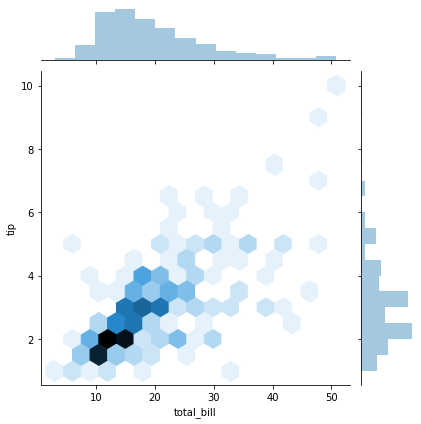

In [11]:
sns.jointplot(data = raw, x = 'total_bill', y = 'tip', kind = 'hex')


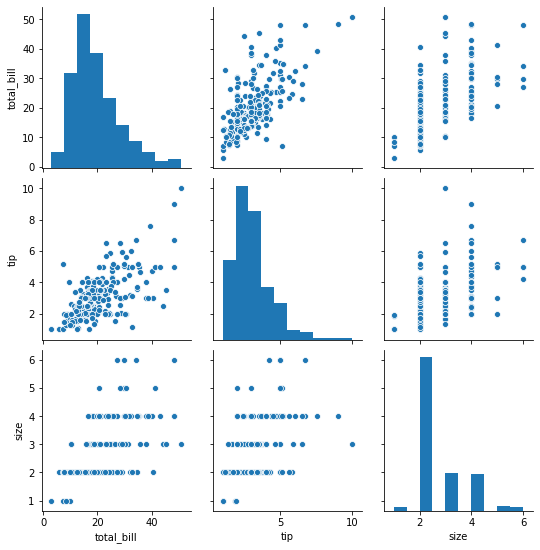

In [12]:
sns.pairplot(raw)
# pairplot shows histogram and scatter plot for each pair of variables

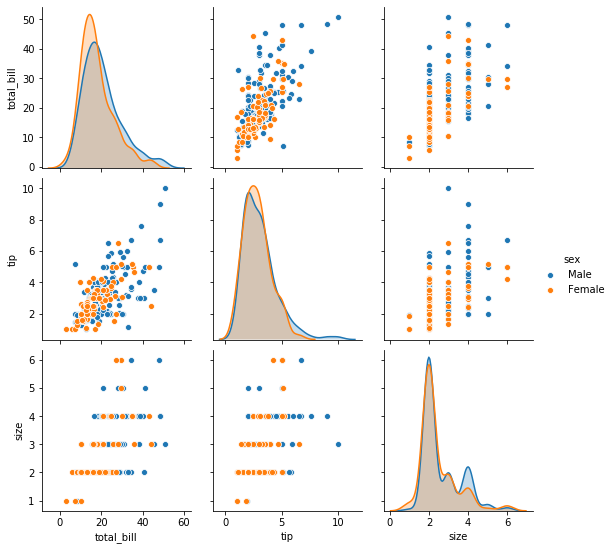

In [13]:
sns.pairplot(raw, hue = 'sex')


## Categorical

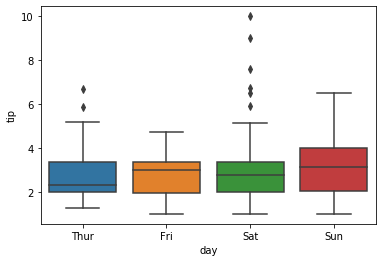

In [14]:
sns.boxplot(data = raw, x = 'day', y = 'tip')

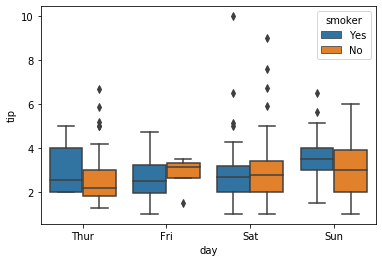

In [15]:
sns.boxplot(data = raw, x = 'day', y = 'tip', hue = 'smoker')

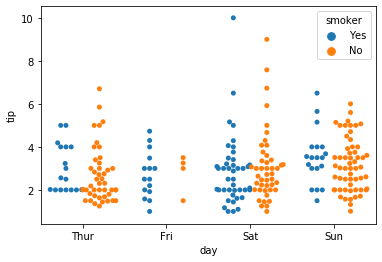

In [18]:
sns.swarmplot(data = raw, x = 'day', y = 'tip', hue = 'smoker', dodge = True)
"""
if dodge = False, points of different color are overlapped, whereas dodge = True separates the points 
according to their color
"""

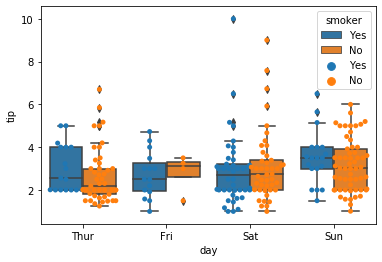

In [19]:
sns.boxplot(data = raw, x = 'day', y = 'tip', hue = 'smoker')
sns.swarmplot(data = raw, x = 'day', y = 'tip', hue = 'smoker', dodge = True)
# two different plots can be drawn together

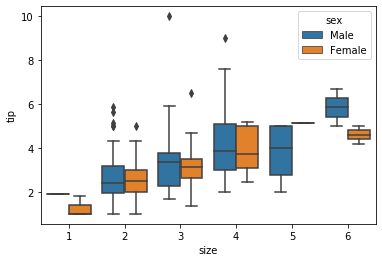

In [20]:
sns.boxplot(data = raw, x = 'size', y = 'tip', hue = 'sex')

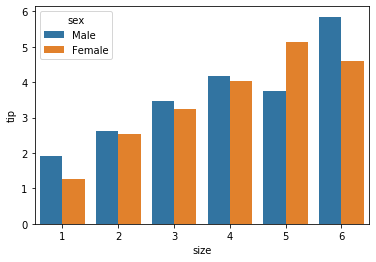

In [22]:
sns.barplot(data = raw, x = 'size', y = 'tip', ci = None, hue = 'sex')
# returns the average of dependent variable

## Heatmap

In [24]:
# heatmap: must be in form of categorical variables in index & column with numerical values inside the table
df = raw.pivot_table(index = 'day', columns = 'size', values = 'tip', aggfunc = 'mean')
df

size,1,2,3,4,5,6
day,,,,,,
Thur,1.83,2.442500,2.692500,4.218000,5.000000,5.3
Fri,1.92,2.644375,3.000000,4.730000,NaN,NaN
Sat,1.00,2.517547,3.797778,4.123846,3.000000,NaN
Sun,NaN,2.816923,3.120667,4.087778,4.046667,5.0


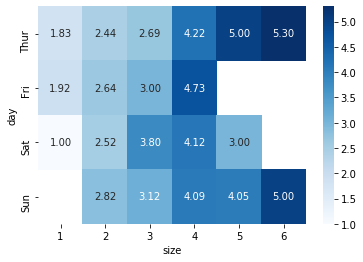

In [29]:
sns.heatmap(data = df, annot = True, fmt = '.2f', cmap = 'Blues')
# adding cmap changes the colors of the boxes, and fmt changes the format of the numbers shown inside each box

# Folium

In [30]:
import folium

## Visualization of Map

1. Background (based on given lat and long)
    * m = folium.Map(location = [long, lat], zoom_start = zoom)
2. Adding items to map
    * Marker
        * folium.Marker([long, lat]).add_to(m)
    * Circle
        * folium.CircleMarker([long, lat], radius).add_to(m)
    * Options inside markers
        * tooltip
        * popup
        

In [31]:
m = folium.Map(location = [37.5536067, 126.9674308], zoom_start = 10)
m

In [35]:
folium.Marker([37.5536067, 126.9674308], tooltip = '서울역', popup = '서울역').add_to(m)
m

In [36]:
folium.CircleMarker([37.5536067, 126.9674308], radius = 4).add_to(m)
m

## Mini-map

In [37]:
from folium.plugins import MiniMap

m = folium.Map([37.5536067, 126.9674308], zoom_start = 12)

mini = MiniMap()
mini.add_to(m)

m

# Map Practice

In [40]:
import pandas as pd

df = pd.read_csv('서울시 대피소 방재시설 현황 (좌표계_ WGS1984).csv', encoding = 'cp949')
df.shape

(694, 13)

In [41]:
df.head()

,고유번호,대피소명칭,소재지,최대수용인원,현재수용인원,현재운영여부,전화번호,행정동코드,행정동명칭,대피단계,비고,경도,위도
0,2,혜화초등학교,혜화동 13-1 (혜화로 32),450,0,N,763-0606,11110650,혜화동,,,126.999891,37.589128
1,3,새샘교회,홍제동 20-4,100,0,N,720-7040,11410655,홍제2동,,,126.950484,37.583660
2,4,한강중앙교회,포은로2가길 66(합정동),130,0,N,337-6629,11440680,합정동,,,126.910028,37.549343
3,5,서울성산초등학교,양화로3길 94(합정동),200,0,N,324-1407,11440680,합정동,,,126.910666,37.553495
4,6,상도1동경로당,상도동 159-282,20,0,N,010-8011-7330,11590530,상도1동,,,126.948269,37.500395


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 694 entries, 0 to 693
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   고유번호    694 non-null    int64  
 1   대피소명칭   694 non-null    object 
 2   소재지     694 non-null    object 
 3   최대수용인원  694 non-null    int64  
 4   현재수용인원  694 non-null    int64  
 5   현재운영여부  694 non-null    object 
 6   전화번호    694 non-null    object 
 7   행정동코드   694 non-null    int64  
 8   행정동명칭   694 non-null    object 
 9   대피단계    694 non-null    object 
 10  비고      694 non-null    object 
 11  경도      694 non-null    float64
 12  위도      694 non-null    float64
dtypes: float64(2), int64(4), object(7)
memory usage: 70.6+ KB


In [48]:
df.loc[0][['위도', '경도']].tolist()

[37.5891283, 126.9998906]

In [49]:
for i in range(len(df)):
    folium.Marker(location = df.loc[i][['위도', '경도']].tolist(), tooltip = df.loc[i, '대피소명칭']).add_to(m)

In [50]:
m

In [51]:
# saving a map to a html file
m.save('Sheltermap.html')

## Cluster Marker
used when there are too many markers on the map and needs to be grouped

In [52]:
from folium.plugins import MarkerCluster

In [53]:
m = folium.Map([37.5536067, 126.9674308], zoom_start = 12)

mini = MiniMap()
mini.add_to(m)

marker_cluster = MarkerCluster().add_to(m)

for i in range(len(df)):
    folium.Marker(location = df.loc[i][['위도', '경도']].tolist(), tooltip = df.loc[i, '대피소명칭']).add_to(marker_cluster)
    
m